# Ridge Regression

$
\begin{align*}
w^* &= (X^TX + \lambda I_m)^{-1} X^T Y \\
w^* &= \sum_i \alpha_i \times x_i \\
\sum_i \alpha_i \times x_i &= (X^TX + \lambda I_m)^{-1} X^T Y \\
\alpha &= (X)^{-1}(X^TX + \lambda I_m)^{-1} X^T Y \\
\alpha^T &= ((X)^{-1}(X^TX + \lambda I_m)^{-1} X^T Y)^T
\end{align*}
$

# Decision Tree

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

%config InlineBackend.figure_format = 'retina'

/home/dang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_and_Y = np.load('./ionosphere.npy')    # Load data from file.
print(f'X_and_Y.shape: {X_and_Y.shape}')
np.random.shuffle(X_and_Y)    # Shuffle the data.
X = X_and_Y[:, 0:X_and_Y.shape[1] - 1]    # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, X_and_Y.shape[1] - 1]    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

X_and_Y.shape: (351, 35)
(351, 34) (351,)


In [3]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
eighty_percent = round(len(X) * .8)
X_train_val = X[:eighty_percent] # Get features from train + val set.
X_test      = X[eighty_percent:] # Get features from test set.     
Y_train_val = Y[:eighty_percent] # Get labels from train + val set.
Y_test      = Y[eighty_percent:] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(281, 34) (70, 34) (281,) (70,)


In [4]:
D = [1, 2, 3, 4, 5]
clf = tree.DecisionTreeClassifier()
parameters = {"criterion": ["entropy"], "max_depth": D}
classifier = GridSearchCV(clf, parameters, return_train_score=True)
gs = classifier.fit(X_train_val, Y_train_val)
gs.cv_results_['mean_train_score']
#model.fit(X_train_val, Y_train_val, criterion="entropy")

array([ 0.85053286,  0.92172981,  0.93239656,  0.96085068,  0.98044905])

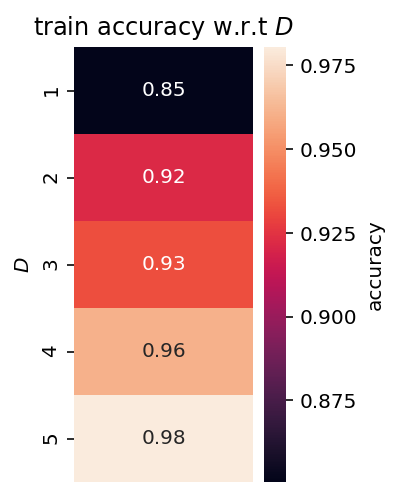

In [5]:
def draw_heatmap_linear(acc, acc_desc, D):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, yticklabels=D, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$D$')
    plt.title(acc_desc + ' w.r.t $D$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

draw_heatmap_linear(gs.cv_results_['mean_train_score'].reshape(-1,1), 'train accuracy', D)

Optimal D is 5

In [6]:
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
model.fit(X_train_val, Y_train_val)
y_predict = model.predict(X_test)
accuracy_score(Y_test, y_predict)

0.88571428571428568